In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import fbprophet
sns.set()

# Importing Data

- The goal here is to predict the number of site visits on Oct-15-2016
- I opted to use a decomposable model developed by facebook which is accurate and intuitive. Facebook tends to use the same type of data that we are working with so I felt this would be the best option. 


In [55]:
df = pd.read_excel('../data/Analysis test.xlsx')

In [56]:
df = df.drop(['Unnamed: 3','Unnamed: 4','Unnamed: 5'],axis=1)

In [57]:
m = fbprophet.Prophet(daily_seasonality=True,)


In [58]:
frame = df.copy()

In [59]:
frame.head()

,Date,Site Visits,Searches
0,2016-08-01,36468,1276
1,2016-08-02,34307,1232
2,2016-08-03,33930,1298
3,2016-08-04,31783,1188
4,2016-08-05,27253,1056


# Fitting and making predicitons
- After fitting and interpreting the model I estimate that on October-15-2016 we can expect around 18-20k visits to our site.

In [60]:
frame = frame.rename(columns={'Date':'ds','Site Visits':'y'})
frame = frame.drop('Searches',axis=1)

In [61]:
m.fit(frame);

/Applications/anaconda3/lib/python3.6/site-packages/fbprophet/forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


In [62]:
future = m.make_future_dataframe(periods=1)


In [63]:
forecast = m.predict(future)


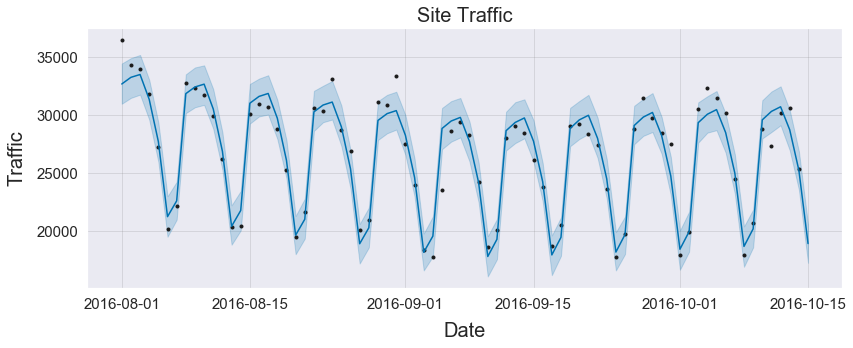

In [67]:
fig, ax = plt.subplots(figsize=(12,5))
m.plot(forecast,ax=ax);
ax.tick_params(axis="both", labelsize=15) 
ax.set_xlabel('Date', fontsize = 20,labelpad=10);
ax.set_ylabel('Traffic', fontsize = 20,labelpad=10);
ax.set_title('Site Traffic',fontsize=20)
fig.tight_layout()
plt.savefig("../images/prediction1.png")


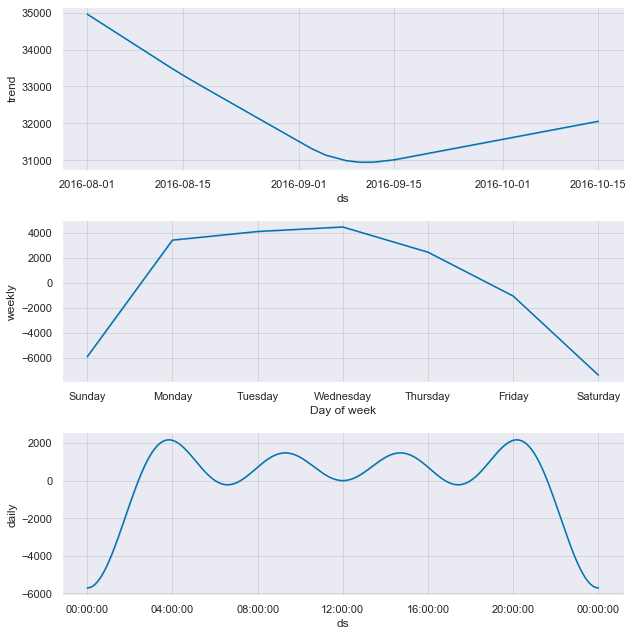

In [65]:
m.plot_components(forecast);



In [50]:
forecast[['ds','yhat_lower','yhat_upper', 'yhat']].tail(1).T

,75
ds,2016-10-15 00:00:00
yhat_lower,17303.4
yhat_upper,20723
yhat,18949.7


## We see some correlation between the number of searches and the number of visitors to our site

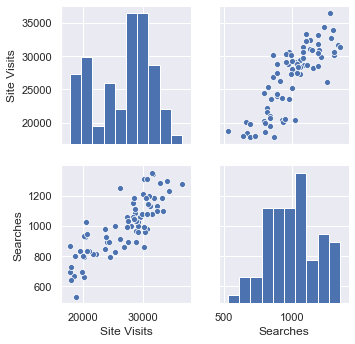

In [53]:
sns.pairplot(df)
